<a href="https://colab.research.google.com/github/BintangPray/Kelompok-5-P2/blob/main/GARCH%20HARGA%20CABAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 9.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [3]:
data = pd.read_excel("MPDW.xlsx")
lambda_bc = -0.7575758
data['Boxcox'] = data['Harga']**lambda_bc
data['Diff'] = np.diff(data['Boxcox'], prepend=data['Boxcox'][0])

In [4]:
data['DiffA'] = data['Diff']*(10**7)
print(data.head())
print(data.shape)

     Tanggal  Harga    Boxcox      Diff       DiffA
0 2022-09-01  62070  0.000234  0.000000    0.000000
1 2022-09-02  57760  0.000247  0.000013  131.061941
2 2022-09-03  59920  0.000240 -0.000007  -67.754291
3 2022-09-04  59450  0.000242  0.000001   14.374220
4 2022-09-05  61310  0.000236 -0.000006  -55.749406
(700, 5)


In [5]:
print(data.tail())

       Tanggal  Harga    Boxcox      Diff       DiffA
695 2024-07-27  75460  0.000202  0.000013  126.770576
696 2024-07-28  69540  0.000215  0.000013  128.801400
697 2024-07-29  79400  0.000194 -0.000021 -205.100756
698 2024-07-30  84850  0.000185 -0.000010  -95.201993
699 2024-07-31  78630  0.000196  0.000011  109.584327


# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 578 amatan dan data uji sebanyak 122 amatan.

Jumlah data latih: 578
Jumlah data uji: 122


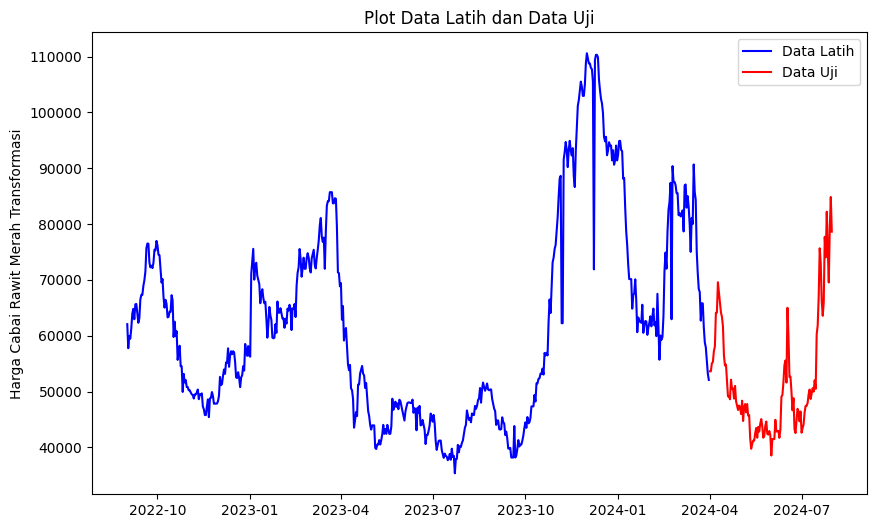

In [8]:
test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Harga'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Harga'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 578
Jumlah data uji: 122


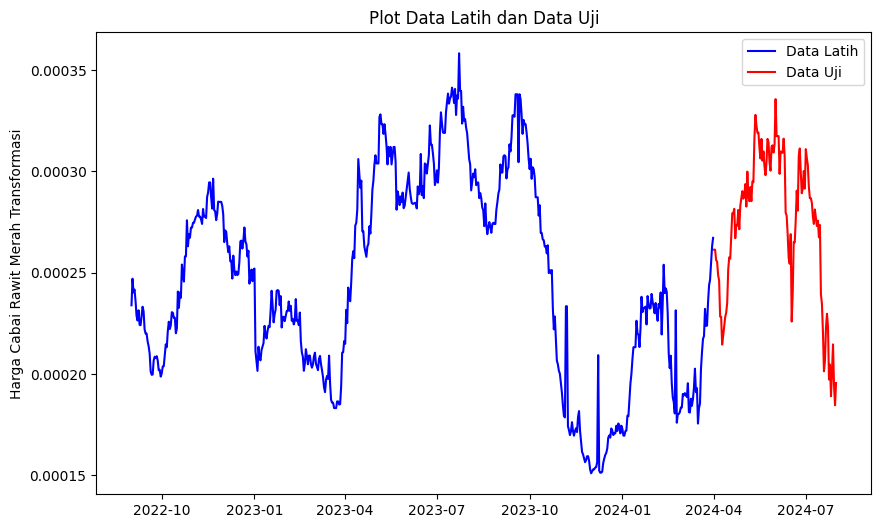

In [9]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 578
Jumlah data uji: 122


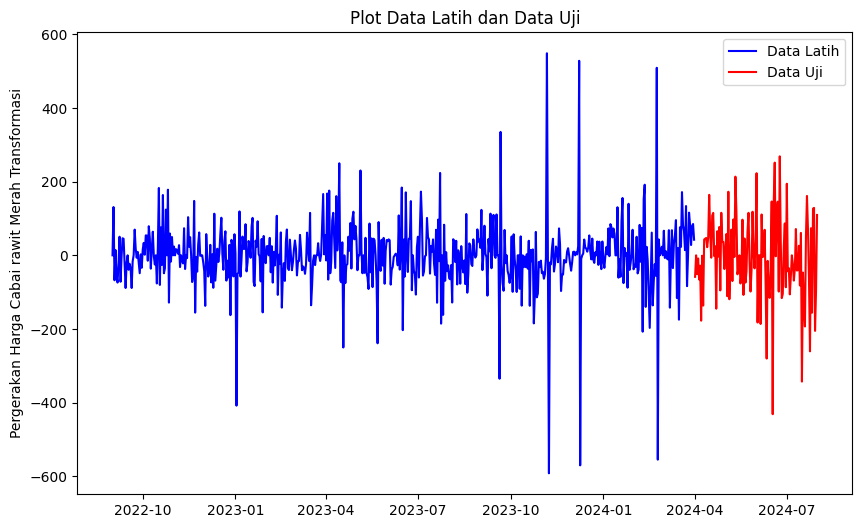

In [10]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Pergerakan Harga Cabai rawit Merah Transformasi')
plt.legend()
plt.show()

In [11]:
data_diffA = data['DiffA'][1:]
train_data_diffA = data_diffA.iloc[:-test_size]
test_data_diffA = data_diffA.iloc[-test_size:]

print(train_data_diffA.head())
print(train_data_diffA.shape)

print(test_data_diffA.head())
print(test_data_diffA.shape)

1    131.061941
2    -67.754291
3     14.374220
4    -55.749406
5    -73.941594
Name: DiffA, dtype: float64
(577,)
578   -58.332650
579     0.000000
580   -51.236937
581    -8.430920
582   -65.532108
Name: DiffA, dtype: float64
(122,)


# Pemodelan GARCH

### Pendugaan Parameter

GARCH(1,1)

In [18]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 1) model
model_garch11_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diffA = model_garch11_diffA.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3515.5507557923265
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3430.1420511731767
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3396.6873317376117
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3387.7547444294614
Iteration:      5,   Func. Count:     29,   Neg. LLF: 3387.6956608983137
Iteration:      6,   Func. Count:     34,   Neg. LLF: 3387.5933792429646
Iteration:      7,   Func. Count:     39,   Neg. LLF: 3387.591636454921
Iteration:      8,   Func. Count:     44,   Neg. LLF: 3387.591585816707
Iteration:      9,   Func. Count:     48,   Neg. LLF: 3387.591585816739
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3387.591585816707
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9


In [19]:
# Display model fitting summary
print(result_garch11_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3387.59
Distribution:                  Normal   AIC:                           6783.18
Method:            Maximum Likelihood   BIC:                           6800.61
                                        No. Observations:                  577
Date:                Tue, Nov 05 2024   Df Residuals:                      576
Time:                        03:33:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.1602      3.691      0.856      0.392 [ -4.074, 10.39

GARCH(1,2)

In [20]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 2) model
model_garch12_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=1, q=2)

# Fit the model
result_garch12_diffA = model_garch12_diffA.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4493.067713100625
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3443.5260277297843
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3388.9346499518188
Iteration:      4,   Func. Count:     28,   Neg. LLF: 3426.0679686664143
Iteration:      5,   Func. Count:     35,   Neg. LLF: 3392.839065522837
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3387.782667904634
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3387.724178715832
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3387.621764668119
Iteration:      9,   Func. Count:     60,   Neg. LLF: 3387.594756457136
Iteration:     10,   Func. Count:     66,   Neg. LLF: 3387.5917984924854
Iteration:     11,   Func. Count:     72,   Neg. LLF: 3387.5915880868533
Iteration:     12,   Func. Count:     78,   Neg. LLF: 3387.5915857769305
Iteration:     13,   Func. Count:     83,   Neg. LLF: 3387.5915860018968
Optimization terminated successfully    (Exit mode 0)
   

In [21]:
# Display model fitting summary
print(result_garch12_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3387.59
Distribution:                  Normal   AIC:                           6785.18
Method:            Maximum Likelihood   BIC:                           6806.97
                                        No. Observations:                  577
Date:                Tue, Nov 05 2024   Df Residuals:                      576
Time:                        03:33:31   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.1599      3.718      0.850      0.395 [ -4.127, 10.44

GARCH(2,1)

In [22]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 1) model
model_garch21_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=2, q=1)

# Fit the model
result_garch21_diffA = model_garch21_diffA.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3457.3479769611927
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3436.571335193025
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3437.821361528516
Iteration:      4,   Func. Count:     29,   Neg. LLF: 3387.969134976098
Iteration:      5,   Func. Count:     35,   Neg. LLF: 3396.4656557533376
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3394.077449231524
Iteration:      7,   Func. Count:     49,   Neg. LLF: 3387.396210304067
Iteration:      8,   Func. Count:     55,   Neg. LLF: 3387.34137769537
Iteration:      9,   Func. Count:     61,   Neg. LLF: 3387.2921344980386
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3387.2681119147014
Iteration:     11,   Func. Count:     73,   Neg. LLF: 3387.266452705044
Iteration:     12,   Func. Count:     79,   Neg. LLF: 3387.2663494188964
Iteration:     13,   Func. Count:     85,   Neg. LLF: 3387.266346941726
Iteration:     14,   Func. Count:     91,   Neg. LLF: 3387.2

In [23]:
# Display model fitting summary
print(result_garch21_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3386.23
Distribution:                  Normal   AIC:                           6782.47
Method:            Maximum Likelihood   BIC:                           6804.25
                                        No. Observations:                  577
Date:                Tue, Nov 05 2024   Df Residuals:                      576
Time:                        03:33:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.3491      3.674      0.911      0.362 [ -3.853, 10.55

GARCH(2,2)

In [24]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 2) model
model_garch22_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=2, q=2)

# Fit the model
result_garch22_diffA = model_garch22_diffA.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3457.3501150719203
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3436.428776217945
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3437.1323946643106
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3387.9899252070254
Iteration:      5,   Func. Count:     40,   Neg. LLF: 3387.762280201223
Iteration:      6,   Func. Count:     47,   Neg. LLF: 3389.1934818827212
Iteration:      7,   Func. Count:     55,   Neg. LLF: 3387.4076635437987
Iteration:      8,   Func. Count:     62,   Neg. LLF: 3387.342610036506
Iteration:      9,   Func. Count:     69,   Neg. LLF: 3387.30846368856
Iteration:     10,   Func. Count:     76,   Neg. LLF: 3387.266486654706
Iteration:     11,   Func. Count:     83,   Neg. LLF: 3387.2663512956115
Iteration:     12,   Func. Count:     90,   Neg. LLF: 3387.2663472748163
Iteration:     13,   Func. Count:     97,   Neg. LLF: 3387.2663462356513
Iteration:     14,   Func. Count:    104,   Neg. LLF: 338

In [25]:
# Display model fitting summary
print(result_garch22_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3386.23
Distribution:                  Normal   AIC:                           6784.47
Method:            Maximum Likelihood   BIC:                           6810.61
                                        No. Observations:                  577
Date:                Tue, Nov 05 2024   Df Residuals:                      576
Time:                        03:34:01   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.3499      3.686      0.909      0.363 [ -3.874, 10.57

Model GARCH(1,1) dipilih sebagai model tentatif terbaik karena memiliki seluruh parameter signifikan

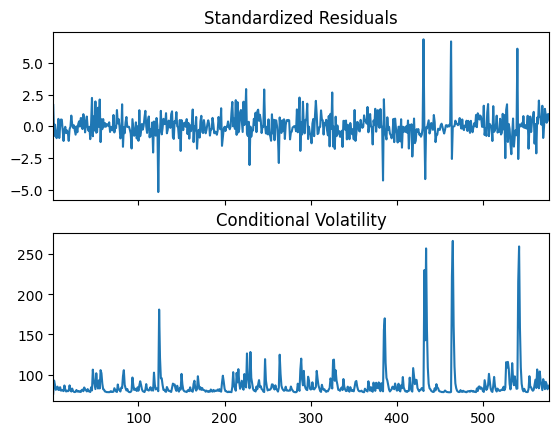

In [27]:
fig = result_garch11_diffA.plot()

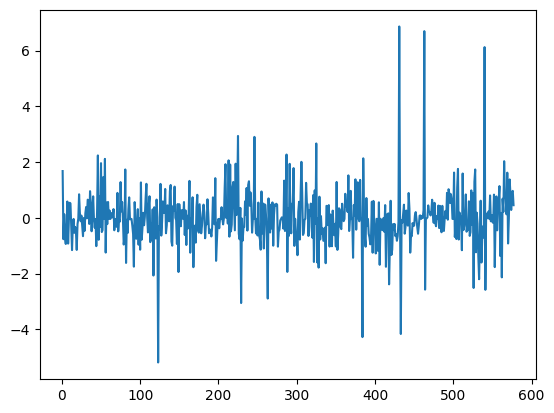

In [28]:
garch_stresidual = result_garch11_diffA.resid / result_garch11_diffA.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [29]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

     lb_stat  lb_pvalue
10  4.946466   0.894725


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [30]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

8.703142057498622e-05


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [31]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.8735113048922967


### Diagnostik Sisaan: Ragam Sisaan Homogen

$H_0$: Ragam sisaan homogen

$H_1$: Ragam sisaan tidak homogen

In [90]:
from scipy.stats import levene

n = len(garch_stresidual)
group1 = garch_stresidual[:n//2]
group2 = garch_stresidual[n//2:]

p_value = levene(group1, group2)
print(p_value)

LeveneResult(statistic=1.7838064619017309, pvalue=0.1822110324129423)


In [32]:
from google.colab import files

garch_stresidual.to_excel("garch_stresidual_A.xlsx", index=False)
files.download("garch_stresidual_A.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
result_garch11_diffA.resid.to_excel("garch_stresidual_nonnormal_A.xlsx", index=False)
files.download("garch_stresidual_nonnormal_A.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [33]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 577)

### Prediksi pada Data Latih

In [34]:
predicted_train = result_garch11_diffA.conditional_volatility * epsilon_train + 3.1602
predicted_train

,cond_vol
1,41.022247
2,-9.639477
3,59.714791
4,126.546546
5,-16.102057
...,...
573,32.878809
574,-16.108516
575,70.918848
576,-184.031226


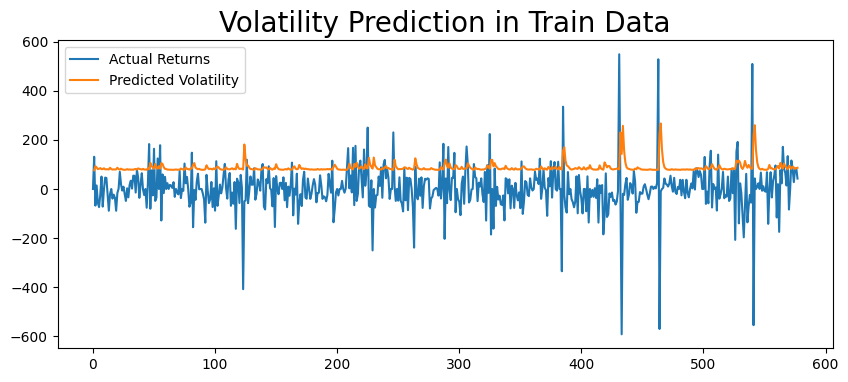

In [35]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['DiffA'])
preds, = plt.plot(result_garch11_diffA.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

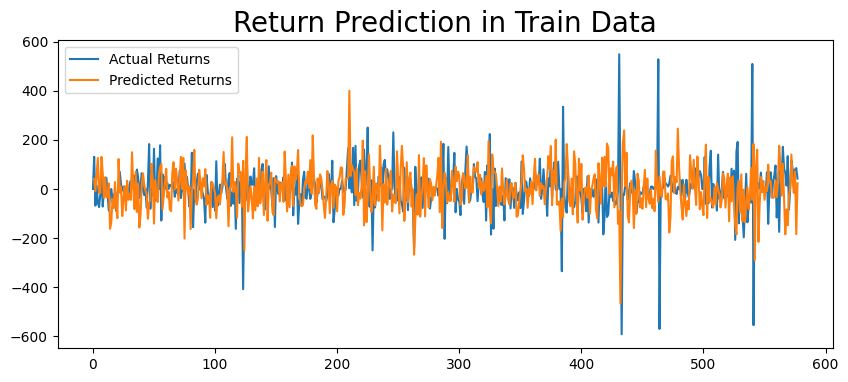

In [36]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['DiffA'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [37]:
from google.colab import files

predicted_train.to_excel("predicted_train_A.xlsx", index=False)
files.download("predicted_train_A.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediksi pada Data Uji

In [38]:
condvar_test = []

for i in range(test_size):
    train = data_diffA[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

In [39]:
condvar_test

[82.0727383324058,
 82.83693432914302,
 79.35987572683179,
 81.13732174339056,
 78.8637011249406,
 82.59887680882753,
 80.07723782849794,
 105.99844167945041,
 87.43863449202975,
 97.70348245671632,
 86.04620612297823,
 82.24371841852486,
 81.16589485181028,
 79.22225500183578,
 80.17338948584883,
 100.94643535448651,
 88.708555554153,
 81.46659800592835,
 89.02354683740911,
 92.56444154237705,
 82.75868417803817,
 79.83628385926731,
 97.34802144174964,
 87.9298240594968,
 81.24815243611567,
 84.00276840284639,
 88.48150391307492,
 92.34498584478324,
 83.72171460107232,
 80.77315886169596,
 80.2949400465611,
 78.67905295867307,
 80.80962690028505,
 90.28908165219447,
 105.2358387320948,
 99.58483681002755,
 85.95633338513255,
 84.49201063865459,
 84.83091305837019,
 88.02630339336716,
 81.1496639846108,
 113.50622508118873,
 101.19408691614159,
 88.64863605365143,
 82.9994351343032,
 79.62521044093769,
 84.37226344204092,
 82.76487355769206,
 87.29578194981795,
 91.66451069082608,
 84.

In [40]:
condvar_test = pd.Series(condvar_test, index=data_diffA.index[-122:])
print(condvar_test)

578     82.072738
579     82.836934
580     79.359876
581     81.137322
582     78.863701
          ...    
695    111.302314
696    105.659521
697    104.302264
698    124.908942
699    105.060554
Length: 122, dtype: float64


In [41]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 122)

In [42]:
predicted_test = condvar_test * epsilon_test + 3.1602
predicted_test

,0
578,43.926891
579,-8.293191
580,54.560682
581,126.734763
582,-15.306002
...,...
695,-126.916370
696,123.910312
697,81.588517
698,101.967163


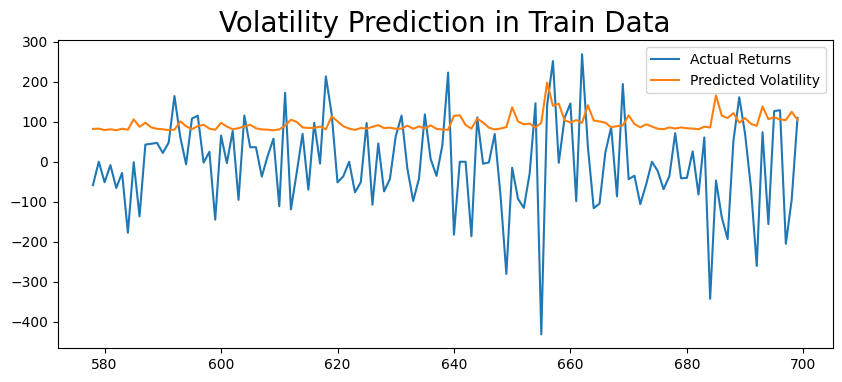

In [43]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['DiffA'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

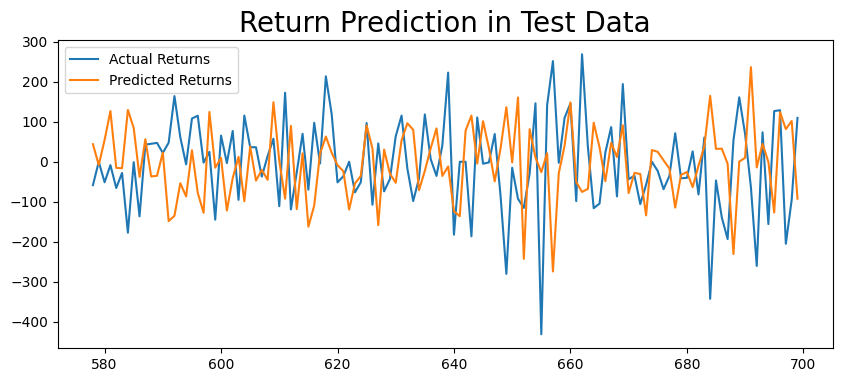

In [45]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diffA[-122:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [46]:
from google.colab import files

predicted_test.to_excel("predicted_test_A.xlsx", index=False)
files.download("predicted_test_A.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRANSFORMASI BALIK

In [48]:
pt_1 = data['Harga'][578]
hasil_prediksi_test_balik = np.r_[pt_1, predicted_test].cumsum()

pt = data['Harga'][0]
hasil_prediksi_train_balik = np.r_[pt, predicted_train].cumsum()

pt = 0
residual_nonnormal_train_balik = np.r_[pt, result_garch11_diffA.resid].cumsum()

pt = 0
residual_train_balik = np.r_[pt, garch_stresidual].cumsum()

In [50]:
A_prediksi_test = pd.DataFrame(hasil_prediksi_test_balik, columns=['Prediksi_Uji'])
A_prediksi_train = pd.DataFrame(hasil_prediksi_train_balik, columns=['Prediksi_Train'])
A_residual_nonnormal_train = pd.DataFrame(residual_nonnormal_train_balik, columns=['Residual_non'])
A_residual_train_balik = pd.DataFrame(residual_train_balik, columns=['Residual'])

A_prediksi_test.to_excel("A_prediksi_test.xlsx", index=False)
files.download("A_prediksi_test.xlsx")

A_prediksi_train.to_excel("A_prediksi_train.xlsx", index=False)
files.download("A_prediksi_train.xlsx")

A_residual_nonnormal_train.to_excel("A_residual_nonnormal_train.xlsx", index=False)
files.download("A_residual_nonnormal_train.xlsx")

A_residual_train_balik.to_excel("A_residual_train_balik.xlsx", index=False)
files.download("A_residual_train_balik.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
print(hasil_prediksi_test_balik)

[53620.         53663.92689071 53655.63369987 53710.19438176
 53836.92914525 53821.62314349 53805.44389382 53935.06309403
 54019.57017941 53981.68018018 54037.85038588 54001.13525156
 53965.99210485 53988.79138914 53840.37721371 53705.24490449
 53651.64418277 53564.95759707 53593.71845818 53516.04313437
 53388.47423097 53512.92959455 53498.06465373 53507.79859085
 53385.68093351 53344.61104292 53357.08904754 53258.40760481
 53296.261633   53249.13533202 53228.73450643 53183.58071008
 53332.47640345 53334.54589776 53242.20634933 53331.92775305
 53213.51043739 53234.6237862  53072.20751724 52962.696482
 52983.18564888 53046.27216371 53068.88373041 53060.34100807
 53036.80877614 52917.25248611 52863.09493953 52827.39000379
 52918.04279118 52951.19941846 52792.75140529 52823.17986661
 52793.47390146 52740.90740311 52794.6299256  52890.97791055
 52970.91642564 52899.83565584 52877.2725727  52910.59182523
 52994.07484744 52958.56195899 52946.86582958 52822.9923434
 52686.94014446 52764.82011

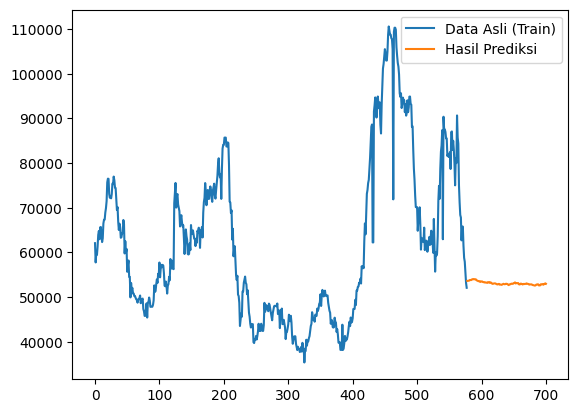

In [52]:
plt.plot(train_data['Harga'], label='Data Asli (Train)')
plt.plot(range(578, 578 + len(hasil_prediksi_test_balik)), hasil_prediksi_test_balik, label='Hasil Prediksi')
plt.legend()
plt.show()

In [53]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], hasil_prediksi_test_balik[-1])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 16.25%


### MAPE DENGAN RESCALING

In [92]:
pre = predicted_test/(10**7)
pt_1 = data['Harga'][578]
hasil_prediksi_test_balik_rescale = np.r_[pt_1, pre].cumsum()

hasil_prediksi_test_balik_rescale

array([53620.        , 53620.00000531, 53620.00000423, 53620.00001106,
       53620.00002668, 53620.00002464, 53620.0000226 , 53620.00003879,
       53620.00004681, 53620.00004241, 53620.00004818, 53620.00004384,
       53620.00003947, 53620.00004222, 53620.00002331, 53620.0000063 ,
       53620.00000097, 53619.99999111, 53619.99999458, 53619.99998577,
       53619.9999719 , 53619.99998694, 53619.99998499, 53619.99998598,
       53619.99997198, 53619.99996683, 53619.99996826, 53619.99995701,
       53619.9999611 , 53619.99995538, 53619.99995277, 53619.99994704,
       53619.99996597, 53619.99996615, 53619.99995584, 53619.99996442,
       53619.99995247, 53619.99995488, 53619.99993551, 53619.99992248,
       53619.99992477, 53619.99993251, 53619.99993455, 53619.9999337 ,
       53619.99993099, 53619.99991645, 53619.99990953, 53619.99990522,
       53619.99991616, 53619.99991993, 53619.99990253, 53619.9999061 ,
       53619.99990255, 53619.99989606, 53619.99990253, 53619.9999132 ,
      

In [93]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], hasil_prediksi_test_balik_rescale[-1])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 16.92%


# Prediksi Keseluruhan Data

In [81]:
condvar_test = []

for i in range(700):
    full = data_diffA
    model = arch_model(full, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

In [82]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 700)

In [83]:
predicted_penuh = condvar_test * epsilon_test + 3.1602
predicted_penuh

array([ 5.30665815e+01, -1.07316348e+01,  6.82354371e+01,  1.56183641e+02,
       -2.03659017e+01, -2.03642521e+01,  1.61828514e+02,  8.02667011e+01,
       -4.40093193e+01,  5.76728576e+01, -4.34007849e+01, -4.36330847e+01,
        2.74708853e+01, -1.89072885e+02, -1.70147540e+02, -5.33345381e+01,
       -9.86020228e+01,  3.47335852e+01, -8.80717403e+01, -1.38738248e+02,
        1.50418389e+02, -1.95242315e+01,  9.94496409e+00, -1.39988583e+02,
       -5.15355879e+01,  1.43049299e+01, -1.12483625e+02,  4.09077225e+01,
       -5.71877958e+01, -2.61471581e+01, -5.72950932e+01,  1.89264222e+02,
        1.80409278e+00, -1.03111234e+02,  8.58037888e+01, -1.19501674e+02,
        2.41453606e+01, -1.93733817e+02, -1.30286692e+02,  2.29394471e+01,
        7.73561831e+01,  2.03780924e+01, -8.45933464e+00, -2.70926040e+01,
       -1.45391401e+02, -6.91647368e+01, -4.31215782e+01,  1.09372485e+02,
        3.76845745e+01, -1.73977806e+02,  3.57219020e+01, -3.55301878e+01,
       -6.48522120e+01,  

In [94]:
pt_1 = data['Harga'][0]
hasil_prediksi_penuh_balik = np.r_[pt_1, predicted_penuh].cumsum()

hasil_prediksi_penuh_balik

array([62070.        , 62123.06658154, 62112.33494672, 62180.57038386,
       62336.7540253 , 62316.38812364, 62296.02387153, 62457.85238573,
       62538.11908686, 62494.10976756, 62551.78262515, 62508.38184023,
       62464.74875553, 62492.2196408 , 62303.14675604, 62132.99921567,
       62079.6646776 , 61981.06265477, 62015.79623995, 61927.72449964,
       61788.98625174, 61939.40464081, 61919.88040928, 61929.82537337,
       61789.83679022, 61738.30120234, 61752.60613226, 61640.12250719,
       61681.03022965, 61623.84243384, 61597.69527571, 61540.4001825 ,
       61729.66440476, 61731.46849754, 61628.35726385, 61714.16105265,
       61594.65937837, 61618.80473894, 61425.07092194, 61294.78423039,
       61317.72367744, 61395.07986053, 61415.45795289, 61406.99861826,
       61379.90601426, 61234.51461348, 61165.3498767 , 61122.22829851,
       61231.60078345, 61269.285358  , 61095.30755191, 61131.02945391,
       61095.4992661 , 61030.64705411, 61095.26423105, 61202.0120885 ,
      

In [85]:
A_hasil_prediksi_penuh_balik = pd.DataFrame(hasil_prediksi_penuh_balik, columns=['Residual'])

A_hasil_prediksi_penuh_balik.to_excel("A_prediksi_seluruh.xlsx", index=False)
files.download("A_prediksi_seluruh.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
pre = predicted_penuh/(10**7)
pt_1 = data['Harga'][0]
hasil_prediksi_penuh_balik_rescale = np.r_[pt_1, pre].cumsum()

hasil_prediksi_penuh_balik_rescale

array([62070.        , 62070.00000531, 62070.00000423, 62070.00001106,
       62070.00002668, 62070.00002464, 62070.0000226 , 62070.00003879,
       62070.00004681, 62070.00004241, 62070.00004818, 62070.00004384,
       62070.00003947, 62070.00004222, 62070.00002331, 62070.0000063 ,
       62070.00000097, 62069.99999111, 62069.99999458, 62069.99998577,
       62069.9999719 , 62069.99998694, 62069.99998499, 62069.99998598,
       62069.99997198, 62069.99996683, 62069.99996826, 62069.99995701,
       62069.9999611 , 62069.99995538, 62069.99995277, 62069.99994704,
       62069.99996597, 62069.99996615, 62069.99995584, 62069.99996442,
       62069.99995247, 62069.99995488, 62069.99993551, 62069.99992248,
       62069.99992477, 62069.99993251, 62069.99993455, 62069.9999337 ,
       62069.99993099, 62069.99991645, 62069.99990953, 62069.99990522,
       62069.99991616, 62069.99991993, 62069.99990253, 62069.9999061 ,
       62069.99990255, 62069.99989606, 62069.99990253, 62069.9999132 ,
      

In [96]:
A_hasil_prediksi_penuh_balik_rescale = pd.DataFrame(hasil_prediksi_penuh_balik_rescale, columns=['Residual'])

A_hasil_prediksi_penuh_balik_rescale.to_excel("A_prediksi_seluruh_rescale.xlsx", index=False)
files.download("A_prediksi_seluruh_rescale.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 31 periode ke depan.

In [60]:
from datetime import datetime, timedelta

data_diffA.index = pd.to_datetime(data_diffA.index)

pred = result_garch11_diffA.forecast(horizon=31)
future_dates = [data_diffA.index[-1] + timedelta(days=i) for i in range(1,32)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 1 Month')

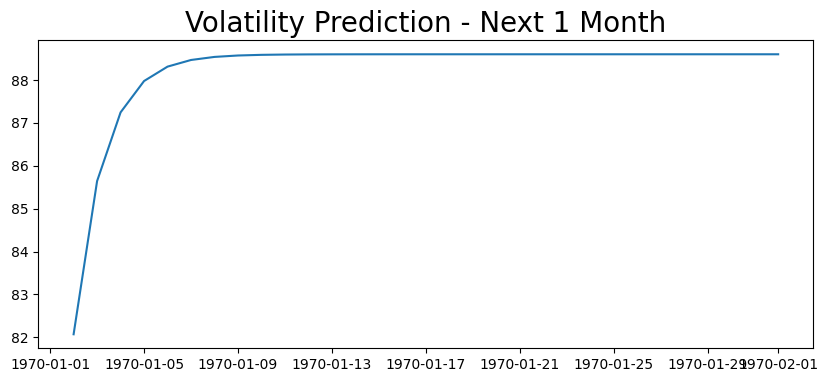

In [61]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 1 Month', fontsize=20)

In [62]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 31)

In [63]:
predicted_forecast = condvar_forecast * epsilon_forecast + 3.1602
predicted_forecast

,0
1970-01-02 00:00:00.000000699,43.926891
1970-01-03 00:00:00.000000699,-8.681197
1970-01-04 00:00:00.000000699,59.667482
1970-01-05 00:00:00.000000699,137.148768
1970-01-06 00:00:00.000000699,-17.518045
1970-01-07 00:00:00.000000699,-17.552831
1970-01-08 00:00:00.000000699,142.978815
1970-01-09 00:00:00.000000699,71.131834
1970-01-10 00:00:00.000000699,-38.428274
1970-01-11 00:00:00.000000699,51.226808


Text(0.5, 1.0, 'Return Forecast - Next 1 Month')

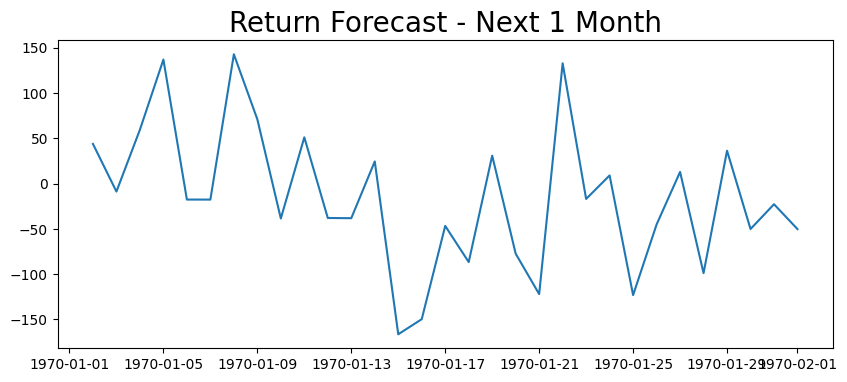

In [64]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 1 Month', fontsize=20)

In [99]:
pt_1 = data['Harga'][699]
hasil_forecast_balik = np.r_[pt_1, predicted_forecast].cumsum()
A_hasil_forecast_balik = pd.DataFrame(hasil_forecast_balik, columns=['Forecast'])
hasil_forecast_balik

array([78630.        , 78673.92689071, 78665.24569342, 78724.91317573,
       78862.06194366, 78844.54389836, 78826.99106781, 78969.9698827 ,
       79041.10171689, 79002.67344269, 79053.90025065, 79016.00372927,
       78977.90166754, 79002.499169  , 78836.14651766, 78686.48214706,
       78639.82465987, 78553.24976983, 78584.25174602, 78506.9625598 ,
       78384.99505335, 78518.00924421, 78501.16604742, 78510.30913169,
       78387.23906137, 78342.1678762 , 78355.15562933, 78256.33975243,
       78292.78615903, 78242.73079081, 78220.04741979, 78169.89743546])

In [100]:
A_hasil_forecast_balik.to_excel("A_forecast_Garch.xlsx", index=False)
files.download("A_forecast_Garch.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
pre = predicted_forecast/(10**7)
pt_1 = data['Harga'][699]
hasil_forecast_balik_rescale = np.r_[pt_1, pre].cumsum()
A_hasil_forecast_balik_rescale = pd.DataFrame(hasil_forecast_balik_rescale, columns=['Forecast'])
hasil_forecast_balik_rescale

array([78630.        , 78630.00000439, 78630.00000352, 78630.00000949,
       78630.00002321, 78630.00002145, 78630.0000197 , 78630.000034  ,
       78630.00004111, 78630.00003727, 78630.00004239, 78630.0000386 ,
       78630.00003479, 78630.00003725, 78630.00002061, 78630.00000565,
       78630.00000098, 78629.99999232, 78629.99999543, 78629.9999877 ,
       78629.9999755 , 78629.9999888 , 78629.99998712, 78629.99998803,
       78629.99997572, 78629.99997122, 78629.99997252, 78629.99996263,
       78629.99996628, 78629.99996127, 78629.999959  , 78629.99995399])

In [102]:
A_hasil_forecast_balik_rescale.to_excel("A_forecast_Garch_rescale.xlsx", index=False)
files.download("A_forecast_Garch_rescale.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>